# 7장 통계분석

### 1. 난수 생성 및 분포함수

#### 난수 발생 함수

In [1]:
rnorm(10, 0, 10)

[1] 13.5756289 -2.3866419 14.1879338 -6.6183953  1.7013765  7.5459710
 [7]  0.5598518 10.0745553  0.3540549  9.9852200

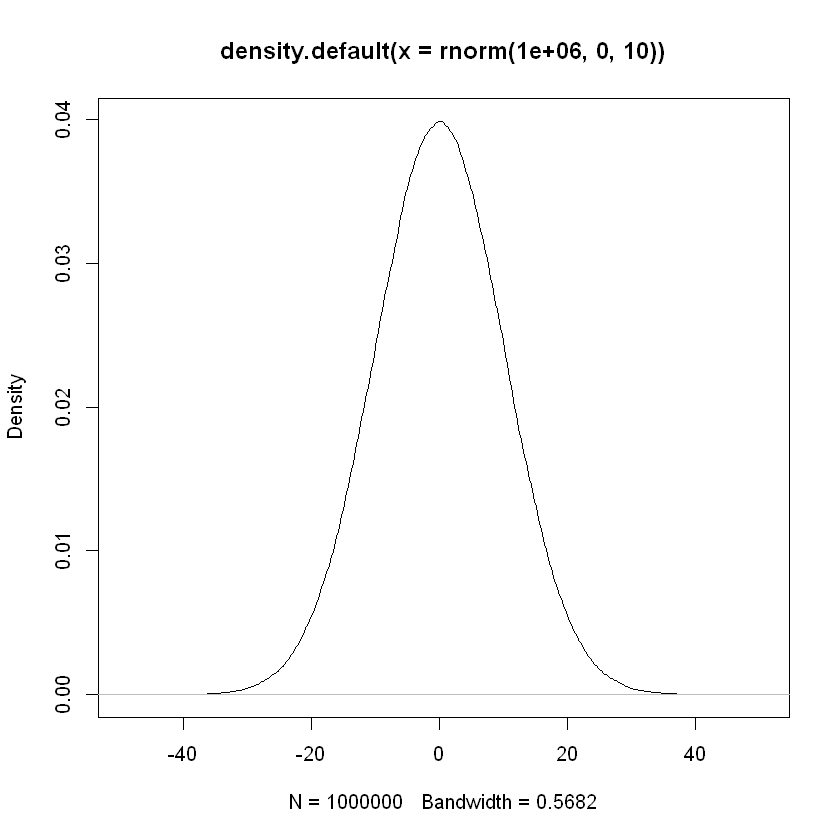

In [2]:
plot(density(rnorm(1000000, 0, 10)))

#### 확률 질량 함수(probability mass function)
* For discrete random variables, $p(x) = P(X = x)$
* AKA probability function

#### 확률 밀도 함수(probability density function)
* For continuous random variables, $f(x)$

#### 분포함수(distribution function)
* For continuous random variable $X$
$$F(x) = P(X \le x) = \int_{-\infty}^x f(x) dx$$
* For discrete random variable $Y$
$$F(y) = P(Y \le y) = \sum_{i=-\infty}^y p(i)$$

#### 분위수(quantile)
* Quantile of $q$ is $x$ such that $F(x) = q$.
* I.e., $F^{-1}(q) = x$.
  * Quantile is inverse function of distribution function

In [3]:
pnorm(1.64)

[1] 0.9494974

In [4]:
qnorm(0.95)

[1] 1.644854

### 2. 기초 통계량

#### 표본 평균/분산/표준편차

#### 다섯 수치 요약
* 최소/최대값, 중앙값(median), 1st & 3rd [사분위수(quartile)](https://en.wikipedia.org/wiki/Quartile)

In [5]:
fivenum(1:11)

[1]  1.0  3.5  6.0  8.5 11.0

In [6]:
summary(1:11)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.5     6.0     6.0     8.5    11.0 

#### 최빈값(mode)
* `table()`, `which.max()`

### 3. 표본 추출

#### 목적
* 모든 자료를 처리하기는 (대부분) 불가능함
* Training data와 test data의 분리
  * Overfitting 막음

#### 단순 임의 추출(simple random sampling)

#### 가중치를 고려한 표본 추출
* 중요도나 빈도가 다를 경우

#### 층화 임의 추출(stratified random sampling)
* 모집단(population)이 subpopulation으로 나누어질 수 있는 경우
  * 추출된 표본으로 부터 Subpopulation 각각에 대한 추정도 가능
* E.g., 남자와 여자가 각각 20%, 80% 존재하는 모집단

#### 계통 추출(systematic sampling)

### 4. 분할표(Contingency Table)

* 명목형(categorical) 또는 순서형(ordinal) 데이터의 frequency를 표 형태로 기록

#### 참고: [데이터 type](https://en.wikipedia.org/wiki/Level_of_measurement)

* 측정형(metric or quantitative)
  * Interval
  * Ratio

* 비측정형(non-metric or qualitative)
  * 명목형(categorical or nominal)
  * 순서형(ordinal)

#### 분할표 작성
* `table()`, `xtabs()`

#### 합, 비율의 계산
* `margin.table()`, `prop.table()`

#### 독립(independence)

* 사건(event)의 독립
  * [정의] 다음 세 조건 중 어느 하나라도 만족하면 두 사건 $A$와 $B$는 서로 독립이라 한다.
    1. $P(A|B) = P(A)$
    1. $P(B|A) = P(B)$
    1. $P(A \cap B) = P(A) P(B)$

* 확률변수의 독립
  * [정의] 2변량 확률변수 $(X,Y)$가 모든 $(x,y) \in R_{X,Y}$에 대하여 아래를 만족하면, 확률변수 $X$와 $Y$는 서로 독립이라 한다.
    * 이산형일 때, $p(x, y) = p_X(x) p_Y(y)$
    * 연속형이 때, $f(x, y) = f_X(x) f_Y(y)$

#### $\chi^2$ 분포
* 표준정규분포를 따르는 확률변수 $Z$에 대하여,
  * $Y = Z^2$ ~ $\chi^2(1)$
* [정리] 확률변수 $X_1, \cdots, X_n$이 서로 독립이고, 각각 자유도가 $\nu_1, \ldots, \nu_n$인 $\chi^2$ 분포를 따를 때, 이들의 합 $\sum_{i=1}^n X_i$는 자유도가 $\sum_{i=1}^n \nu_i$인 $\chi^2$ 분포를 따른다.
* [정리] $(X_1, X_2, \cdots, X_k)$가 다항분포 $MN_k(n; p_1, p_2, \cdots, p_k)$를 따르면 다음 통계량 $Q$는 점근적으로 자유도가 $k - 1$인 $\chi^2$ 분포를 따른다.
$$ Q = \sum_{i=1}^k \frac{(X_i - n p_i)^2}{n p_i} $$

#### $r \times c$ 분할표
* 특성 $A$에 따라 $r$ 개의 범주 $A_1, \cdots, A_r$로 분류
* 특성 $B$에 따라 $c$ 개의 범주 $B_1, \cdots, B_c$로 분류
* $A_i$와 $B_j$에 동시에 속할 확률이 $p_{ij}$
* 확률변수 $X_{ij}$: $n$ 개의 표본을 추출했을 때 $A_i$와 $B_j$에 동시에 속하는 것들의 개수
  * $(X_{11}, \cdots, X_{1c}, \cdots, X_{r1}, \cdots, X_{rc}) \sim MN_{rc}(n; p_{11}, \cdots, p_{1c}, \cdots, p_{r1}, \cdots, p_{rc})$
  * $E(X_{ij}) = n p_{ij}$
* 위 [정리]에 의하여 $n$이 크면 다음 통계량 $Q$는 근사적으로 $\chi^2(rc - 1)$을 따른다.
$$ Q = \sum_{i=1}^r \sum_{i=1}^c \frac{(X_{ij} - n p_{ij})^2}{n p_{ij}} $$

#### 주변 분포
* $p_{i \cdot} = \sum_{j=1}^c p_{ij}$
  * 추출된 표본이 범주 $A_i$에 속할 확률
* $p_{\cdot j} = \sum_{i=1}^r p_{ij}$
  * 추출된 표본이 범주 $B_j$에 속할 확률
* 최우 추정값
$$ \hat{p_{i \cdot}} = \frac{1}{n} \sum_{j=1}^c x_{ij} = \frac{x_{i \cdot}}{n}, \quad i = 1, \cdots, r $$
$$ \hat{p_{\cdot} j} = \frac{1}{n} \sum_{i=1}^r x_{ij} = \frac{x_{\cdot j}}{n}, \quad j = 1, \cdots, c $$

#### 참고: 추정량(estimator)와 추정값(estimate)
* 추정량의 예
$$ \bar{X} = \frac{\sum_{i=1}^n X_i}{n} $$
* 추정값의 예
$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$
* 최우추정량(maximum likelihood estimator)
* 불편추정량(unbiased estimator)

#### 독립성 검정
* 독립성에 대한 가설
  * $H_0$: 모든 $(i, j)$에 대해 $p_{ij} = p_{i \cdot} \times p_{\cdot j}$
  * $H_1$: $p_{ij} \ne p_{i \cdot} \times p_{\cdot j}$인 $(i, j)$가 있다
* $e_{ij} = E(X_{ij}) = n p_{i \cdot} p_{\cdot j}$
  * $H_0$가 참일 때 기대 도수(frequency)
* $e_{ij}$의 최우 추정값
$$ \hat{e_{ij}} = n \hat{p_{i \cdot}} \hat{p_{\cdot j}} = \frac{x_{i \cdot} \times x_{\cdot j}}{n} $$
* 검정 통계량의 값
$$ q = \sum_{i=1}^r \sum_{i=1}^c \frac{(x_{ij} - n \hat{p_{i \cdot}} \hat{p_{\cdot j}})^2}{n \hat{p_{i \cdot}} \hat{p_{\cdot j}}} = \sum_{i=1}^r \sum_{i=1}^c \frac{(x_{ij} - \hat{e_{ij}})^2}{\hat{e_{ij}}} $$
* 검증
  * 주어진 유의수준 $\alpha$에 대해, $q > \chi^2_\alpha((r - 1)(c - 1))$이면 독립이라는 가설 $H_0$를 기각한다.

#### $p$-value
* 유의수준 $\alpha$를 정하는 것은 어려운 문제
  * E.g., $\alpha = 5\%$면 $H_0$ 기각, $\alpha = 1\%$면 채택
* $p$-value: 표본으로부터 얻은 검정통계량 $T$의 실제 관측값이 $t_0$이고 $H_0$가 참일 때, 확률변수 $T$가 실제 관측값 $t_0$와 같거나 $t_0$보다 더 극단적인 값을 가질 확률
* 즉, 기각역의 형태가 $T \ge c$면,
$$ p\text{-value} = P(T \ge t_0 | H_0) $$

### 5. 적합도 검정

#### 카이 제곱 검정
* 독립성 검정
* 동질성 검정
  * 표본의 모집단이 특정한 분포를 따른지 확인
  * $e_{i}$를 가정한 분포에서 계산

#### [샤피로-윌크 검정](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
* 표본이 정규분포에서 추출된 것인지 검정

#### [콜모고로프 스미르노프 검정](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)
* 누적분포함수를 사용한 검정

#### Q-Q 도
* 표본
$$ x_1 < x_2 < \cdots < x_n $$
* 가설
  * $H_0$: 표본이 $F(x)$의 분포함수를 가지는 분포를 따름
  * $H_1$: 그렇지 않음
* 표본분포함수
$$ G(x_i) = P(X < x_i) = \frac{i - 3/8}{n + 1/4} $$
* Q-Q 도
  * $(F^{-1}(G(x_i)), x_i)$를 plotting

### 6. 상관분석
#### Covariance of $X$ and $Y$
$$ \text{cov}(X, Y) = E[(X - E(X))(Y - E(Y))] $$
#### 피어슨 상관 계수
$$ \rho_{X,Y} = \text{cor}(X,Y) = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} $$
#### Linear dependency
* Independent random variables $\rightarrow$ cor() = 0
  * e.g., 다변수 정규분포
* cor() = 0 $\nrightarrow$ indepencence
  * e.g., $Y = X^2$
#### Sample correlation coefficient (추정량)
$$ r_{x,y} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n s_x s_y} $$

### 7. 추정 및 검정

#### 일표본 평균
* $t$-분포
  * [정리] 두 확률변수 $Z$와 $W$가 독립이고, 각각 표준정규분포와 자유도 $\nu$인 $\chi^2$ 분포를 따를 때, 다음의 확률변수 $T$는 자유도가 $\nu$인 $t$-분포를 따른다.
$$ T = \frac{Z}{\sqrt{W/\nu}} $$
* 표본분산
  * [정리] $X_1, \ldots, X_n$이 정규분포 $N(\mu, \sigma^2)$로부터의 확률표본일 때,
$$ \frac{(n - 1)S^2}{\sigma^2} \sim \chi^2(n-1) $$
* 검정통계량
$$ \frac{\bar{X} - \mu}{S / \sqrt{n}} \sim t(n - 1) $$

#### 독립 이표본 평균
* 두 모집단의 표본
  * $X_1, \ldots, X_{n_1}$: $N(\mu_1, \sigma_1^2)$의 확률표본
  * $Y_1, \ldots, Y_{n_2}$: $N(\mu_2, \sigma_2^2)$의 확률표본
* $\sigma_1 = \sigma_2 = \sigma$의 경우
  * [정리]
$$ \bar{X} - \bar{Y} \sim N(\mu_1 - \mu_2, \sigma^2(1/n_1 + 1/n_2)) $$
$$ \frac{(n_1 + n_2 - 2)S_p^2}{\sigma_2} = \frac{\sum_{i=1}^{n_1} (X_i - \bar{X}^2)}{\sigma^2} + \frac{\sum_{i=1}^{n_2} (Y_i - \bar{Y}^2)}{\sigma^2} \sim \chi^2(n_1 + n_2 - 2) $$
  * 검정통계량
$$ T = \frac{\bar{X} - \bar{Y} - (\mu_1 - mu_2)}{S_p \sqrt{1/n_1 + 1/n_2}} \sim t(n_1 + n_2 - 2) $$